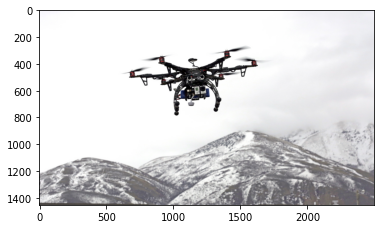

In [6]:
'''
@title Sobel's Playground
@author Jordan Stafford
'''

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from ipywidgets import interact
    
image = '170427-drone-utah-police-njs-847a.jpg'#'predator.jpg'

img = Image.open(image)
plt.imshow(img)

In [2]:

#thresh = 175
def adj_thresh(thresh):
    image = '170427-drone-utah-police-njs-847a.jpg'#'predator.jpg'

    img = Image.open(image)
    
    fn = lambda x : 255 if x > thresh else 0
    imgGray = img.convert('L').point(fn,mode='1')
    imgGray.save('pure.jpg')

    img = plt.imread('pure.jpg')
    plt.imshow(img)
interact(adj_thresh,thresh=widgets.IntSlider(min=1,max=200,step=2,value=100))



interactive(children=(IntSlider(value=100, description='thresh', max=200, min=1, step=2), Output()), _dom_clas…

<function __main__.adj_thresh(thresh)>

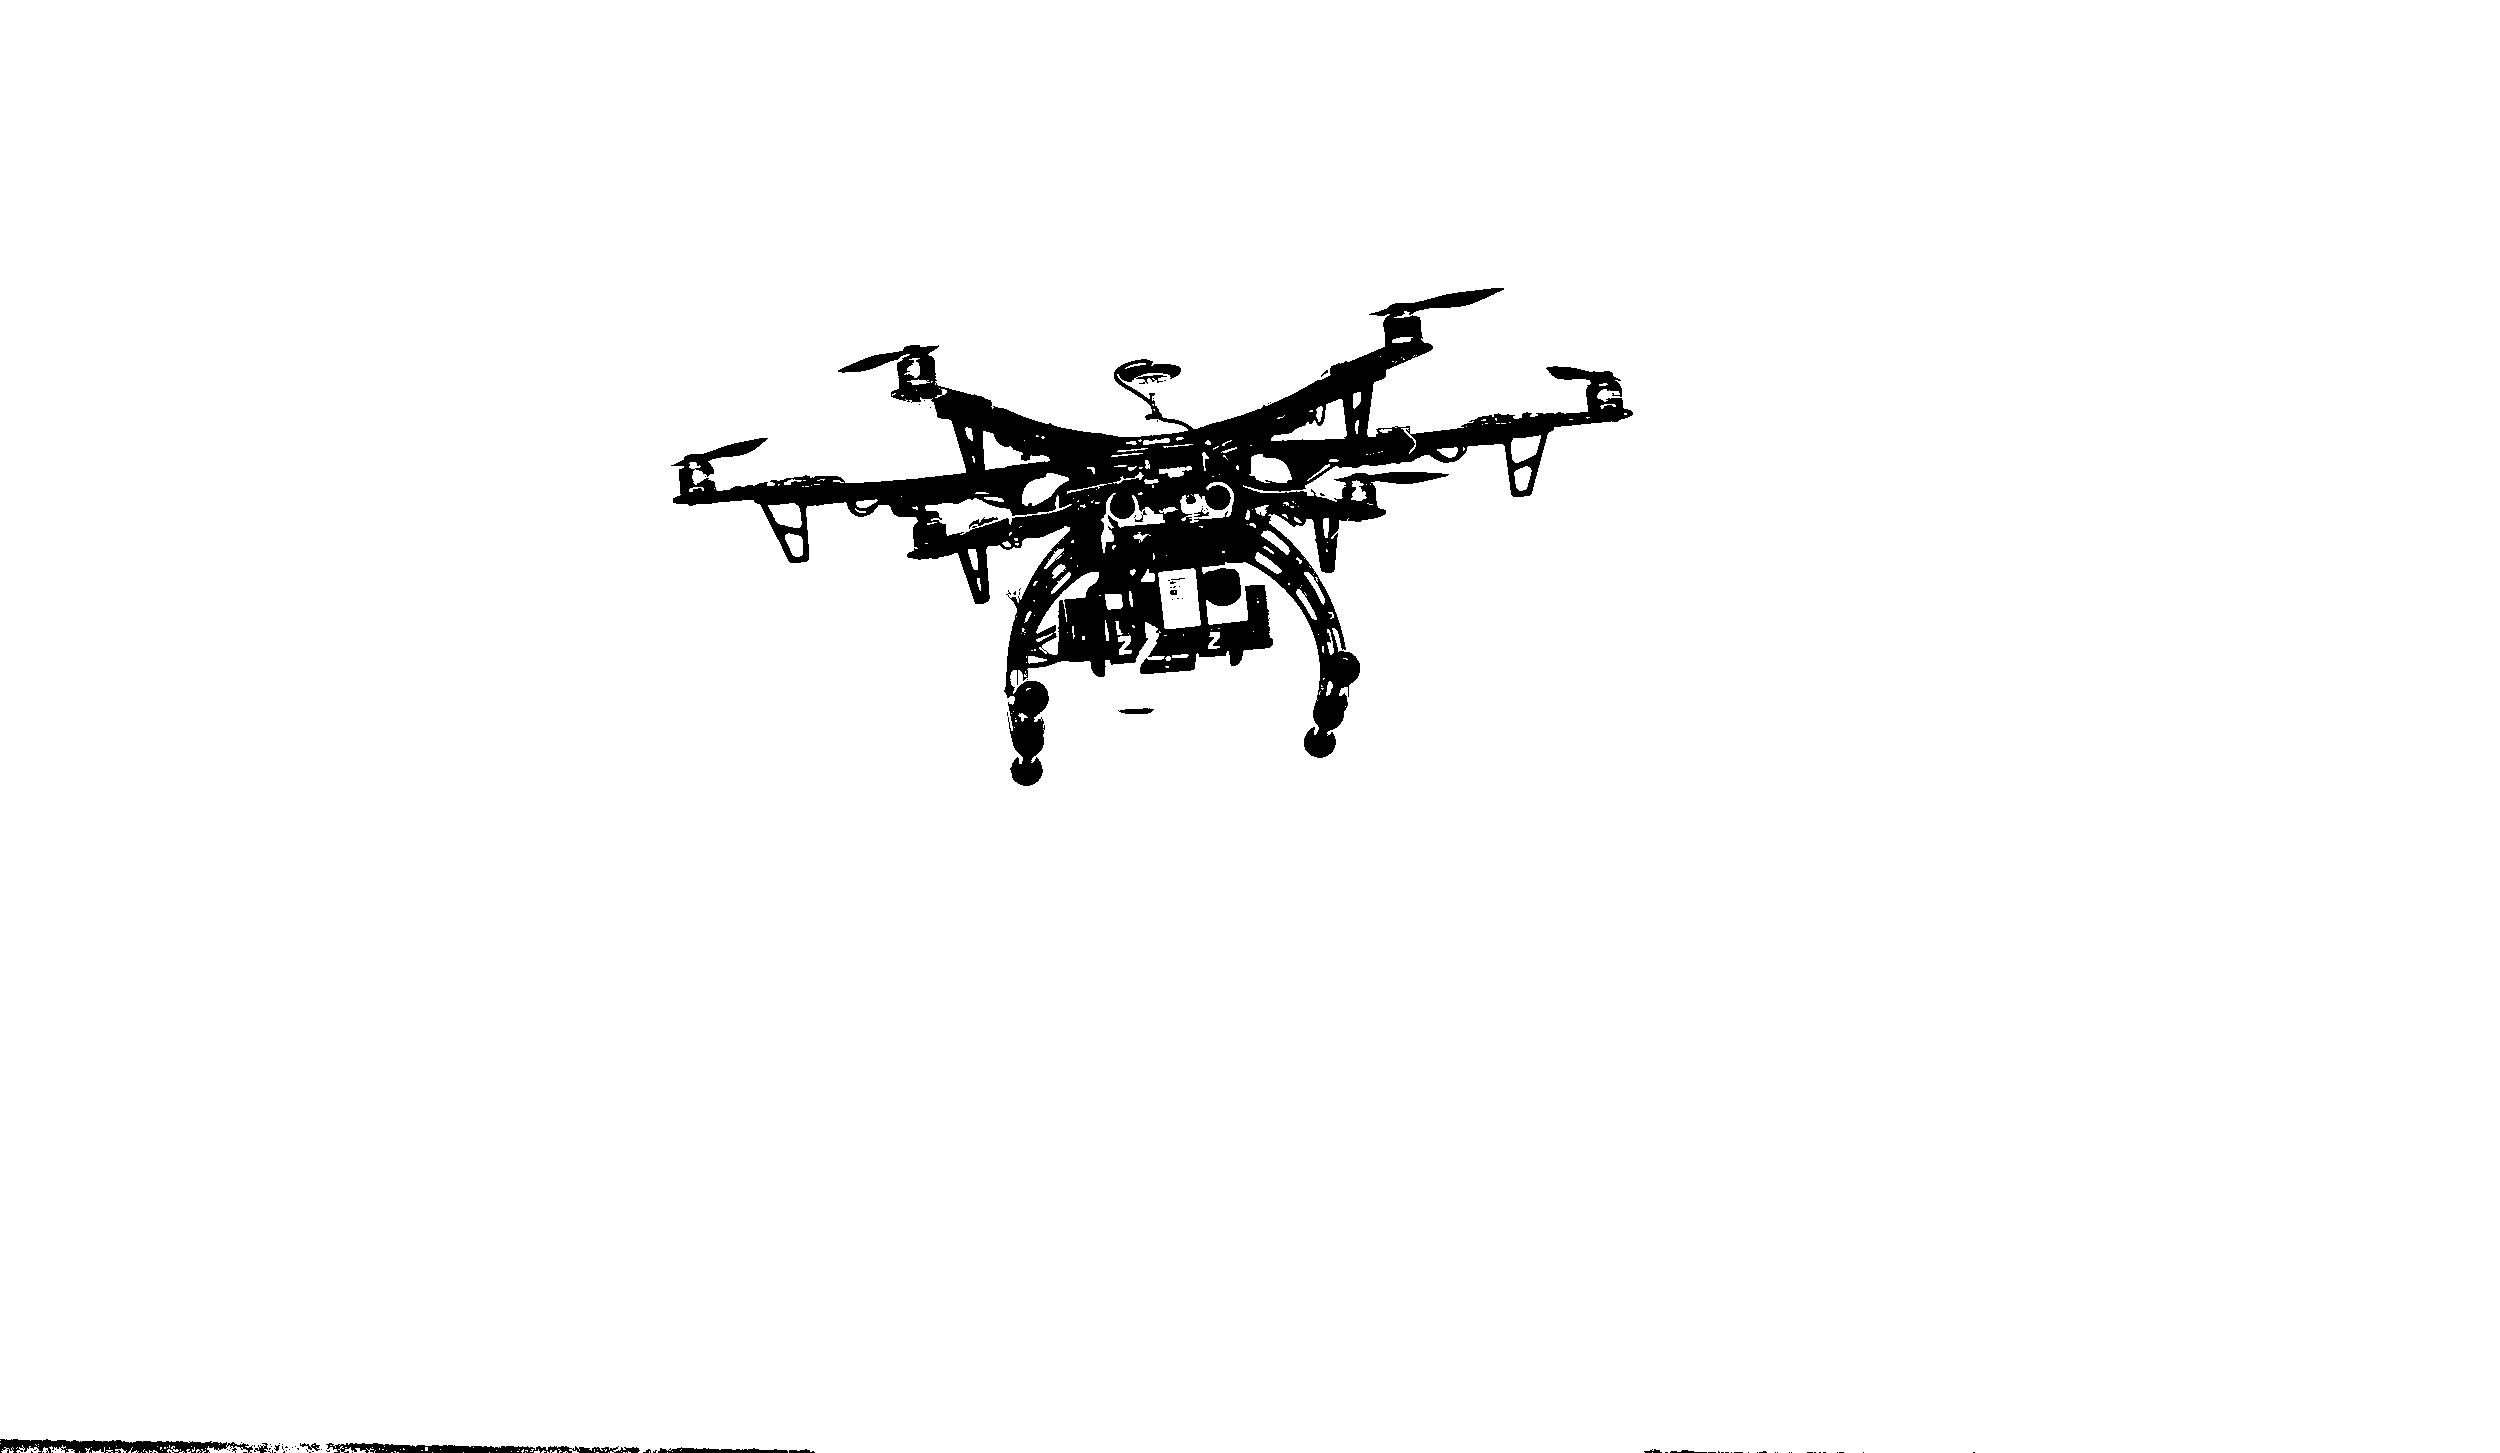

In [8]:
black_and_white_converted = Image.open('pure.jpg')
black_and_white_converted

In [4]:
vertical_filter =   [[-1,-2,-1],[ 0,0,0],[ 1,2,1]]
horizontal_filter = [[-1, 0, 1],[-2,0,2],[-1,0,1]]
img = plt.imread('pure.jpg')
n,m = img.shape


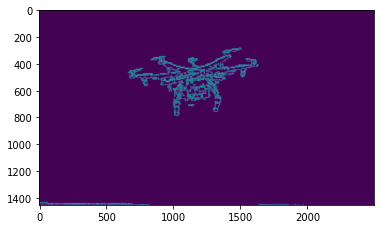

In [130]:
vertical_edges_img = np.zeros_like(img)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = img[row-1:row+2,col-1:col+2]
        transformed_pixels = vertical_filter*local_pixels
        vertical_score = (transformed_pixels.sum() + 4)/8
        vertical_edges_img[row,col] = vertical_score*3

plt.imshow(vertical_edges_img)


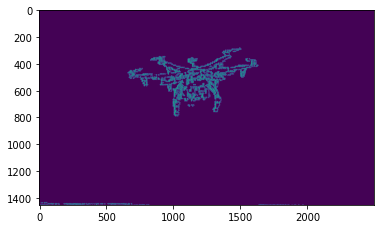

In [131]:
horizontal_edges_img = np.zeros_like(img)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = img[row-1:row+2,col-1:col+2]
        transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = (transformed_pixels.sum() + 4)/8
        horizontal_edges_img[row,col] = horizontal_score*3
plt.imshow(horizontal_edges_img)

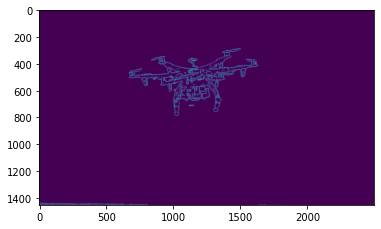

In [5]:
edges_img = np.zeros_like(img)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = img[row-1:row+2,col-1:col+2]
        
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        edges_img[row,col] = edge_score*3
edges_img = edges_img / edges_img.max()

plt.imshow(edges_img)